## Importing necessary libraries and datasets

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from scipy import stats
import time
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [10]:
df = pd.read_csv(r'housing_train.csv', encoding = "latin1")
df1 = df.copy()
df1

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195.0,apartment,1908.0,3.0,2.0,1.0,...,0.0,0.0,0.0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120.0,apartment,1319.0,3.0,2.0,1.0,...,0.0,0.0,0.0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825.0,apartment,1133.0,1.0,1.5,1.0,...,0.0,0.0,0.0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800.0,apartment,927.0,1.0,1.0,1.0,...,0.0,0.0,0.0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785.0,apartment,1047.0,2.0,1.0,1.0,...,0.0,0.0,0.0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96346,7035039061,https://spacecoast.craigslist.org/apa/d/melbou...,space coast,https://spacecoast.craigslist.org,1025.0,apartment,1000.0,2.0,2.0,1.0,...,0.0,0.0,0.0,w/d in unit,NaN,https://images.craigslist.org/00h0h_dT5DKjFX0d...,Find your new apartment at The Park at Parma i...,28.1116,-80.6724,fl
96347,7029562658,https://spacecoast.craigslist.org/apa/d/palm-b...,space coast,https://spacecoast.craigslist.org,1029.0,apartment,890.0,2.0,2.0,0.0,...,0.0,0.0,0.0,laundry on site,NaN,https://images.craigslist.org/00k0k_koHCYMBZgq...,-Business Center-On-site Maintenance-Swimming ...,28.0371,-80.6355,fl
96348,7035274977,https://spacecoast.craigslist.org/apa/d/palm-b...,space coast,https://spacecoast.craigslist.org,1142.0,apartment,1462.0,4.0,3.0,1.0,...,0.0,0.0,0.0,w/d hookups,NaN,https://images.craigslist.org/00j0j_3QFUMoQhrU...,VIEW OUR WEBSITE: http://www.malabarcove.com/...,27.9964,-80.6806,fl
96349,7035273810,https://spacecoast.craigslist.org/apa/d/melbou...,space coast,https://spacecoast.craigslist.org,1229.0,apartment,1157.0,3.0,2.0,0.0,...,0.0,0.0,0.0,laundry on site,off-street parking,https://images.craigslist.org/00E0E_i5vBWWEMMH...,"HUGE fitness Studio, overlooking our beautiful...",28.0691,-80.6200,fl


## Data Preprocessing

In [11]:
df1.drop(["id", "url", "region_url", "image_url"], inplace = True, axis=1)

In [12]:
df1.drop(["description"], inplace = True, axis=1)

In [13]:
df1.drop(["state"], inplace = True, axis=1)

In [14]:
df1

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long
0,birmingham,1195.0,apartment,1908.0,3.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,laundry on site,street parking,33.4226,-86.7065
1,birmingham,1120.0,apartment,1319.0,3.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,laundry on site,off-street parking,33.3755,-86.8045
2,birmingham,825.0,apartment,1133.0,1.0,1.5,1.0,1.0,1.0,0.0,0.0,0.0,laundry on site,street parking,33.4226,-86.7065
3,birmingham,800.0,apartment,927.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,laundry on site,street parking,33.4226,-86.7065
4,birmingham,785.0,apartment,1047.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,laundry on site,street parking,33.4226,-86.7065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96346,space coast,1025.0,apartment,1000.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,w/d in unit,NaN,28.1116,-80.6724
96347,space coast,1029.0,apartment,890.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,laundry on site,NaN,28.0371,-80.6355
96348,space coast,1142.0,apartment,1462.0,4.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,w/d hookups,NaN,27.9964,-80.6806
96349,space coast,1229.0,apartment,1157.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,laundry on site,off-street parking,28.0691,-80.6200


In [15]:
df1.dtypes

region                      object
price                      float64
type                        object
sqfeet                     float64
beds                       float64
baths                      float64
cats_allowed               float64
dogs_allowed               float64
smoking_allowed            float64
wheelchair_access          float64
electric_vehicle_charge    float64
comes_furnished            float64
laundry_options             object
parking_options             object
lat                        float64
long                       float64
dtype: object

In [16]:
cat = ["region", "type", "laundry_options", "parking_options"]
for x in cat:
    print((df1[x].value_counts()).count())

93
12
5
7


In [17]:
(df1.groupby(by=["region"]).count()).sort_values(by=["price"])

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long
region,,,,,,,,,,,,,,,
st augustine,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
athens,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2
atlanta,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3
treasure coast,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3
augusta,6,6,6,6,6,6,6,6,6,6,6,5,4,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
stockton,2571,2571,2571,2571,2571,2571,2571,2571,2571,2571,2571,2127,1757,2569,2569
ventura county,2579,2579,2579,2579,2579,2579,2579,2579,2579,2579,2579,1998,1770,2578,2578
jacksonville,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,1748,1411,2577,2577


In [18]:
df1.isna().sum()

region                         1
price                          1
type                           1
sqfeet                         1
beds                           1
baths                          1
cats_allowed                   1
dogs_allowed                   1
smoking_allowed                1
wheelchair_access              1
electric_vehicle_charge        1
comes_furnished                1
laundry_options            18843
parking_options            34836
lat                          513
long                         513
dtype: int64

In [19]:
df1.dropna(axis=0, inplace = True)

In [20]:
df2 = df1.drop(["region"], axis=1)

In [21]:
df2

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long
0,1195.0,apartment,1908.0,3.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,laundry on site,street parking,33.4226,-86.7065
1,1120.0,apartment,1319.0,3.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,laundry on site,off-street parking,33.3755,-86.8045
2,825.0,apartment,1133.0,1.0,1.5,1.0,1.0,1.0,0.0,0.0,0.0,laundry on site,street parking,33.4226,-86.7065
3,800.0,apartment,927.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,laundry on site,street parking,33.4226,-86.7065
4,785.0,apartment,1047.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,laundry on site,street parking,33.4226,-86.7065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96341,890.0,apartment,865.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,laundry on site,off-street parking,28.0691,-80.6200
96342,1049.0,apartment,725.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,laundry on site,off-street parking,28.1450,-80.6647
96344,1225.0,apartment,1191.0,3.0,2.5,1.0,1.0,1.0,0.0,0.0,0.0,w/d hookups,off-street parking,28.0413,-80.6259
96345,750.0,apartment,690.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,laundry on site,off-street parking,28.0691,-80.6200


In [22]:
df2.drop('baths', axis=1, inplace=True)

<AxesSubplot:>

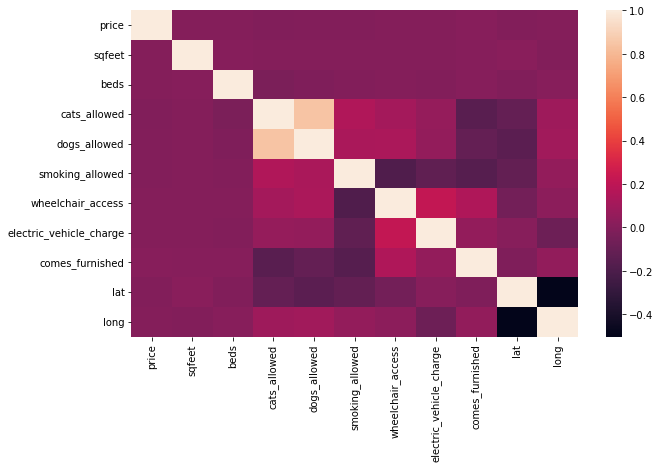

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr())

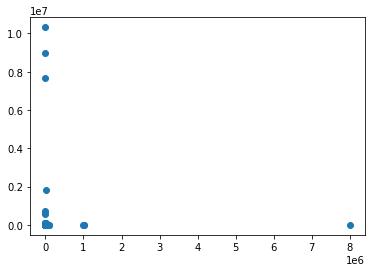

In [24]:
plt.scatter(df2.sqfeet, df2.price)

In [25]:
mean_price = df2.price.mean()
std_price = df2.price.std()

In [26]:
outlier_indices = list((df2.loc[df2.price>mean_price+3*std_price]).sort_values("price", ascending = False).index)

In [27]:
df2.drop(outlier_indices, inplace=True)

In [28]:
mean_sqfeet = df2.sqfeet.mean()
sqfeet_std = df2.sqfeet.std()
outlier_indices_sqft = list((df2.loc[df2.sqfeet>mean_sqfeet+3*sqfeet_std]).sort_values("sqfeet", ascending = False).index)

In [29]:
df2.drop(outlier_indices_sqft, inplace=True)

In [30]:
# (df2.loc[df2.price>mean_price+2*std_price]).sort_values("price", ascending = False)
df2 = df2[df2['sqfeet']<=6000]
df2 = df2[df2['price']<=10000]

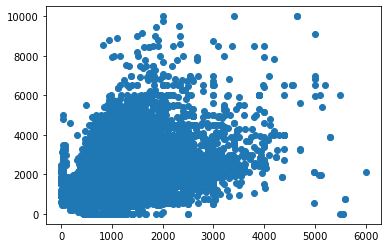

In [31]:
plt.scatter(df2.sqfeet, df2.price)

In [32]:
df2.shape

(59740, 14)

In [33]:
minmax = MinMaxScaler(feature_range=(1,10))

In [34]:
df2['price'] = minmax.fit_transform(np.array(df2['price']).reshape((-1,1)))
df2

,price,type,sqfeet,beds,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long
0,2.0755,apartment,1908.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,laundry on site,street parking,33.4226,-86.7065
1,2.0080,apartment,1319.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,laundry on site,off-street parking,33.3755,-86.8045
2,1.7425,apartment,1133.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,laundry on site,street parking,33.4226,-86.7065
3,1.7200,apartment,927.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,laundry on site,street parking,33.4226,-86.7065
4,1.7065,apartment,1047.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,laundry on site,street parking,33.4226,-86.7065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96341,1.8010,apartment,865.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,laundry on site,off-street parking,28.0691,-80.6200
96342,1.9441,apartment,725.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,laundry on site,off-street parking,28.1450,-80.6647
96344,2.1025,apartment,1191.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,w/d hookups,off-street parking,28.0413,-80.6259
96345,1.6750,apartment,690.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,laundry on site,off-street parking,28.0691,-80.6200


<AxesSubplot:>

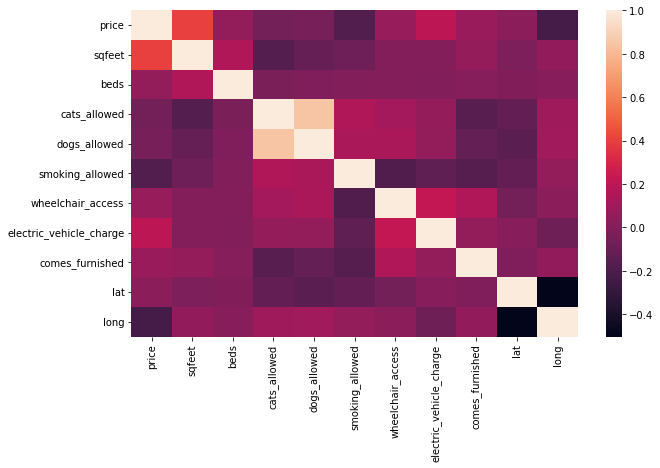

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr())

In [36]:
df2.drop(['lat', 'long'], axis=1, inplace=True)

In [37]:
# df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [38]:
le = LabelEncoder()
# df2 = df2.apply(le.fit_transform)

In [39]:
ohe = OneHotEncoder()

In [40]:
ss = StandardScaler()

In [41]:
cat = ["type", "laundry_options", "parking_options"]
num= ["sqfeet", "beds", "baths", "lat", "long"]

In [42]:
import torch

In [43]:
X = (df2.iloc[:, 1:])
Y = (df2["price"])
# X = X.astype("float32")
# Y = Y.astype("float32")
X = pd.get_dummies(X, columns=cat)

In [44]:
from sklearn.model_selection import train_test_split
train_x, X_test, train_y, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

train_y

40523    2.0755
68616    2.4895
22214    2.5255
27438    3.7000
23657    1.7398
          ...  
84943    2.1619
54508    2.1511
1330     1.5490
23350    1.9135
89969    1.8550
Name: price, Length: 40025, dtype: float64

In [45]:
train_x_tr=torch.from_numpy(np.array(train_x)).float()
train_y_tr=torch.from_numpy(np.array(train_y)).float()
test_x_tr = torch.from_numpy(np.array(X_test)).float()
test_y_tr = torch.from_numpy(np.array(y_test)).float()

In [46]:
train_x.shape

(40025, 32)

## Creating a linear model with pytorch

In [47]:
lossl = []

In [48]:
class MyModel(torch.nn.Module):
    def __init__(self):
        super(MyModel,self).__init__()

        self.net = torch.nn.Sequential(
        torch.nn.Linear(32, 3),
            
#         torch.nn.Linear(1,3)

        )

    def forward(self,x):
        return self.net(x)
    
modelA = MyModel()

optimizer = torch.optim.Adam(params=modelA.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.2)

def criterion(input, target):
    ## Other Losses
    # Normal loss
    #loss = (((input[0] - target)/torch.exp(input[1]))**2+input[1]).mean()
    # Laplace loss
    #loss = (torch.abs((input[0] - target)/torch.exp(input[1]))+input[1]).mean()
    # t-distribution loss
    #nu = 3
    #loss = ((nu + 1)/2*torch.log(1+((input[0] - target)/torch.exp(input[1]))**2/nu)+input[1]).mean()
    # print(input, target)

    ## Quanile Loss
    q1 = 0.20
    q2 = 0.5
    q3 = 0.80
    

    ## Keras quantile loss, https://www.evergreeninnovations.co/blog-quantile-loss-function-for-machine-learning/    
    #e = y_p-y    
    #return tf.keras.backend.mean(tf.keras.backend.maximum(q*e, (q-1)*e))

    ## Quantile Loss
    ## for q1, q2, q3
    #print(input.shape)
    #print(input[:,0:1].shape)
#     print(yqs.shape)
    e1 = input[:, 0] - target # !!! if input[:,0]  -> shape = (1000,)
    e2 = input[:, 1] - target
    e3 = input[:, 2] - target
    eq1 = torch.max(q1*e1, (q1-1)*e1)
    eq2 = torch.max(q2*e2, (q2-1)*e2)
    eq3 = torch.max(q3*e3, (q3-1)*e3)
    
    #eq1 = torch.max(0.05*e1, (0.05-1)*e1)
    #eq2 = torch.max(0.5*e2, (0.5-1)*e2)
    #eq3 = torch.max(0.95*e3, (0.95-1)*e3)

    loss = (eq1 + eq2 + eq3).mean()

    return loss
      


for step in range(5000):
    #yq1, yq2, yq3 = model(x)
    #loss = criterion(input=(yq1, yq2, yq3), target=y)
    yqs = modelA(train_x_tr)
    loss = criterion(input=yqs, target =train_y_tr)
    lossl.append(loss)
    #print(yqs.shape, train_y_tr.shape)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (step+1) % 500 == 0:
        """
        Show your intermediate results
        """
        print('epoch {} loss={:.4}'.format(step+1, loss.data.item()))

    if (step+1) % 250 == 0:
        scheduler.step(loss)
    

epoch 500 loss=0.6287
epoch 1000 loss=0.5178
epoch 1500 loss=0.4801
epoch 2000 loss=0.4706
epoch 2500 loss=0.4686
epoch 3000 loss=0.4682
epoch 3500 loss=0.4693
epoch 4000 loss=0.4681
epoch 4500 loss=0.4683
epoch 5000 loss=0.4684


In [49]:
y_pred = modelA(test_x_tr)

In [50]:
y_pred

tensor([[2.7521, 2.3994, 2.0670],
        [2.5816, 2.2835, 1.9895],
        [2.2209, 1.8826, 1.6345],
        ...,
        [2.8134, 2.4314, 2.0927],
        [2.3872, 2.0411, 1.7992],
        [2.4661, 1.9291, 1.5671]], grad_fn=<AddmmBackward0>)

In [51]:
test_y_tr

tensor([2.6200, 2.7145, 1.9675,  ..., 2.2915, 1.7875, 2.6155])

In [52]:
predictions = y_pred.detach().cpu().numpy()
predictions

array([[2.7520702, 2.3994129, 2.0669549],
       [2.5816493, 2.2834966, 1.9894621],
       [2.2209067, 1.8826206, 1.6345439],
       ...,
       [2.813371 , 2.4313524, 2.09269  ],
       [2.3871632, 2.041118 , 1.7991633],
       [2.4660726, 1.9290934, 1.5670545]], dtype=float32)

In [53]:
predictions_mean = predictions[:, 1]

In [54]:
y_test

31162    2.6200
49328    2.7145
86429    1.9675
44406    4.8655
49919    3.3418
          ...  
17559    1.7560
5232     1.6840
38257    2.2915
62867    1.7875
69015    2.6155
Name: price, Length: 19715, dtype: float64

## Visualizing training loss

In [55]:
lossl = [x.detach().cpu().numpy() for x in lossl]

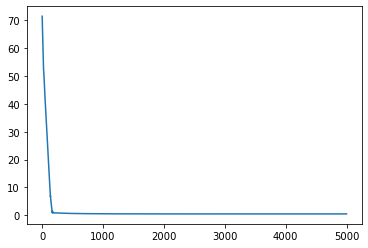

In [56]:
lossl = np.array(lossl)
ind = [i for i in range(1, lossl.shape[0]+1)]
plt.plot(ind, lossl)

## Checking Validity of Predictions

In [57]:
param_list = []
for params in modelA.parameters():
    param_list.append(list(params.detach().numpy()))

In [58]:
coeff_upper = (param_list[0][0]).reshape((len(param_list[0][0]), 1))
coeff_lower = param_list[0][2].reshape((len(param_list[0][0]), 1))
coeff_ = param_list[0][1].reshape((len(param_list[0][0]), 1))

In [59]:
coeff_upper.shape

(32, 1)

## Evaluating the linear model

In [60]:
y_test_arr = np.array(y_test)
y_test_arr

array([2.62  , 2.7145, 1.9675, ..., 2.2915, 1.7875, 2.6155])

In [61]:
mae(y_test_arr, predictions_mean) # Model Performance

0.38291608597864996

In [62]:
ridge = Ridge()  # Evaluating the linear model against a ridge regressor

In [63]:
params = [{"alpha":[10, 100, 1000]}]
htp = GridSearchCV(ridge, params, scoring="neg_mean_absolute_error", cv=5)

In [64]:
htp.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=Ridge(), param_grid=[{'alpha': [10, 100, 1000]}],
             scoring='neg_mean_absolute_error')

In [65]:
htp.best_estimator_

Ridge(alpha=10)

In [66]:
y_preds = htp.predict(X_test)
mae(y_preds, y_test)

0.3933898612267257